<a href="https://colab.research.google.com/github/rama96/hugging-face/blob/master/Chapter4_Multilingual_Named_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers 
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 27.7 MB/s 
     |████████████████████████████████| 120 kB 59.4 MB/s 
     |████████████████████████████████| 6.6 MB 48.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 28.9 MB/s 
     |████████████████████████████████| 115 kB 59.3 MB/s 
     |████████████████████████████████| 212 kB 60.2 MB/s 
     |████████████████████████████████| 127 kB 68.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [43]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [2]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")


XTREME has 183 configurations


In [3]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets

['PAN-X.af',
 'PAN-X.ar',
 'PAN-X.bg',
 'PAN-X.bn',
 'PAN-X.de',
 'PAN-X.el',
 'PAN-X.en',
 'PAN-X.es',
 'PAN-X.et',
 'PAN-X.eu',
 'PAN-X.fa',
 'PAN-X.fi',
 'PAN-X.fr',
 'PAN-X.he',
 'PAN-X.hi',
 'PAN-X.hu',
 'PAN-X.id',
 'PAN-X.it',
 'PAN-X.ja',
 'PAN-X.jv',
 'PAN-X.ka',
 'PAN-X.kk',
 'PAN-X.ko',
 'PAN-X.ml',
 'PAN-X.mr',
 'PAN-X.ms',
 'PAN-X.my',
 'PAN-X.nl',
 'PAN-X.pt',
 'PAN-X.ru',
 'PAN-X.sw',
 'PAN-X.ta',
 'PAN-X.te',
 'PAN-X.th',
 'PAN-X.tl',
 'PAN-X.tr',
 'PAN-X.ur',
 'PAN-X.vi',
 'PAN-X.yo',
 'PAN-X.zh']

In [6]:
xtreme_subsets[:5]

['XNLI', 'tydiqa', 'SQuAD', 'PAN-X.af', 'PAN-X.ar']

In [8]:
# German Corpus
from datasets import load_dataset
ds = load_dataset("xtreme",name="PAN-X.de")
ds


Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [10]:
len(ds["train"]) , ds["train"].num_rows

(20000, 20000)

In [11]:
from collections import defaultdict
from datasets import DatasetDict

langs = ["de","fr","it","en"]
fracs = [0.629,0.229,0.084,0.059]

panx_ch = defaultdict(DatasetDict)

for lang,frac in zip(langs, fracs):
  ds = load_dataset("xtreme",name=f"PAN-X.{lang}")
  
  for split in ds:
    panx_ch[lang][split] = ds[split].shuffle(seed=0).select(range(int(frac*len(ds[split]))))

panx_ch

  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

defaultdict(datasets.dataset_dict.DatasetDict, {'de': DatasetDict({
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 12580
                 })
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
             }), 'fr': DatasetDict({
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 4580
                 })
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 2290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                  

In [12]:
panx_ch["de"]["train"][0]

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de']}

In [13]:
panx_ch["de"]["train"].features.items()

dict_items([('tokens', Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)), ('ner_tags', Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)), ('langs', Sequence(feature=Value(dtype='string', id=None), length=-1, id=None))])

In [17]:
ner_tags = panx_ch["de"]["train"].features["ner_tags"]
print(ner_tags)
tags = ner_tags.feature
print(tags)

Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


ClassLabel always has int2str functionality as we've seen before in the previous chapters

In [18]:
def create_tag_names(batch):
  return {'ner_name_tags':[tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)
panx_de


  0%|          | 0/12580 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_name_tags'],
        num_rows: 12580
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_name_tags'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_name_tags'],
        num_rows: 6290
    })
})

In [33]:
panx_de.set_format("pandas")
de_example = panx_de["train"][0]
de_example

,tokens,ner_tags,langs,ner_name_tags
0,"[2.000, Einwohnern, an, der, Danziger, Bucht, ...","[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]","[de, de, de, de, de, de, de, de, de, de, de, de]","[O, O, O, O, B-LOC, I-LOC, O, O, B-LOC, B-LOC,..."


In [34]:
panx_de.reset_format()

In [37]:
de_example = panx_de["train"][0]
de_example

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de'],
 'ner_name_tags': ['O',
  'O',
  'O',
  'O',
  'B-LOC',
  'I-LOC',
  'O',
  'O',
  'B-LOC',
  'B-LOC',
  'I-LOC',
  'O']}

In [38]:
import pandas as pd
pd.DataFrame([de_example["tokens"] , de_example["ner_name_tags"]],["Tokens","Tags"])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


Calculating the number of occurances of NER elements i.e ORG , LOC , PER in the de dataset

In [39]:
from collections import Counter
split2freqs = defaultdict(Counter)

for split , dataset in panx_de.items():
  for row in dataset["ner_name_tags"]:
    for tag in row:
      if tag.startswith('B-'):
        tag_type = tag.split("-")[1]
        split2freqs[split][tag_type] += 1       
split2freqs


defaultdict(collections.Counter,
            {'train': Counter({'LOC': 6186, 'ORG': 5366, 'PER': 5810}),
             'validation': Counter({'ORG': 2683, 'LOC': 3172, 'PER': 2893}),
             'test': Counter({'LOC': 3180, 'PER': 3071, 'ORG': 2573})})

In [41]:
pd.DataFrame.from_dict(split2freqs , orient = "index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


This looks good—the distributions of the
roughly the same for each split, so the validation and test sets should provide a good measure of our NER tagger’s ability to generalize. Next, let’s look at a few popular multilingual transformers and how they can be adapted to tackle our NER task.


## Multilingual Transformers

* Multilingual transformers involve similar architectures and training procedures as their monolingual counterparts, except that the corpus used for pretraining consists of documents in many languages.
* A remarkable feature of this approach is that despite receiving no explicit information to differentiate among the languages, the resulting linguistic representations are able to generalize well across languages for a variety of downstream tasks. 
* In some cases, this ability to perform cross-lingual transfer can produce results that are competitive with those of monolingual models, which circumvents the need to train one model per language!

Multilingual transformer models are usually evaluated in three different ways:
1. en : Fine-tune on the English training data and then evaluate on each language’s test set.
2. each : Fine-tune and evaluate on monolingual test data to measure per- language performance.
3. all : Fine-tune on all the training data to evaluate on all on each language’s test set.

One of the first multilingual transformers was mBERT, which uses the same architecture and pretraining objective as BERT but adds Wikipedia articles from many languages to the pretraining corpus. Since then, mBERT has been superseded by XLM-RoBERTa (or XLM-R for short), so that’s the model we’ll consider in this chapter.


RoBERTa’s developers improved on several aspects of BERT, in particular by removing the next sentence prediction task altogether.3 XLM-R also drops the language embeddings used in XLM and uses SentencePiece to tokenize the raw texts directly.4 Besides its multilingual nature, a notable difference between XLM-R and RoBERTa is the size of the respective vocabularies: 250,000 tokens versus 55,000!
XLM-R is a great choice for multilingual NLU tasks. In the next section, we’ll explore how it can efficiently tokenize across many languages.

### A Closer Look at Tokenization

Instead of using a WordPiece tokenizer, XLM-R uses a tokenizer called SentencePiece that is trained on the raw text of all one hundred languages.

In [50]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name,use_auth_token=True)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name,use_auth_token=True)

text = "Jack Sparrow loves New York!"

bert_tokens = bert_tokenizer(text)
bert_tokens

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

{'input_ids': [101, 2132, 23665, 8674, 7871, 1203, 1365, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [51]:
xlmr_tokens = xlmr_tokenizer(text)
xlmr_tokens

{'input_ids': [0, 21763, 37456, 15555, 5161, 7, 2356, 5753, 38, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [52]:
bert_tokens.tokens()

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'York', '!', '[SEP]']

In [53]:
xlmr_tokens.tokens()

['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁York', '!', '</s>']

Here we see that instead of the [CLS] and [SEP] tokens that BERT uses for sentence classification tasks, XLM-R uses <`s> and <`\s>
to denote the start and end



## The Tokenizer Pipeline


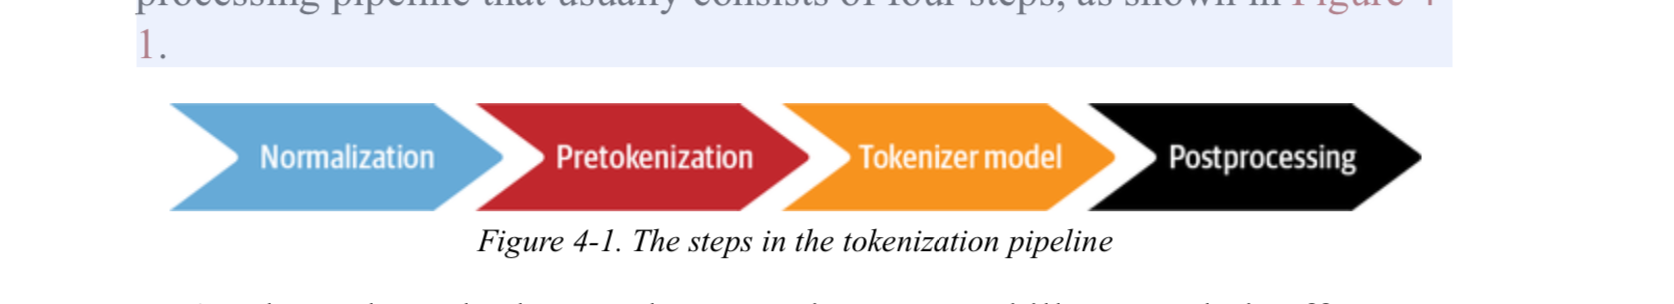